# Аналіз модуля №1 (Тест). КН-1 2024

---

## 1. Пакети

In [5]:
# install.packages("tidyverse")

In [2]:
library(tidyverse)
library(readxl)

## 2. Читання документа

In [3]:
path <- "data/test.xlsx"

In [4]:
group <- "kn1" #ek2

In [5]:
test_data <- read_excel(path, sheet = group)
keys_data <- read_excel(path, sheet = "keys")

In [19]:
colnames(test_data) <- c("No", "Std", "Group", "V", paste0("Q", 1:20), "Check")
test_data |> head()

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,D,B,D,A,B,B,...,C,A,D,B,A,C,C,D,D,5.25
23,Котюк Богдан Юрійович,КН-1(5)-5,5,C,C,A,B,D,C,...,C,D,B,A,C,C,A,C,C,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,C,B,A,C,C,C,...,C,B,A,B,D,A,B,B,D,6.75
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,B,B,B,A,B,D,...,A,D,A,D,B,B,A,C,C,3.00
41,Остапчук Микола Валентинович,КН-1(5)-2,5,D,A,B,B,A,C,...,B,B,A,B,D,C,D,D,C,3.75
54,Стуга Едуард Леонідович,КН-1(5)-1,8,C,C,B,A,B,B,...,D,D,D,B,D,D,C,C,D,2.25


In [21]:
test_data <- test_data |>
    #mutate(Std = "****** ****") |>
    mutate_at(colnames(test_data)[5:24], factor, levels = c("A", "B", "C", "D", "X")) |>
    mutate(across(contains("Q"), ~replace_na(.x, "X")))
#head(test_data)

test_data |> head()

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,D,B,D,A,B,B,...,C,A,D,B,A,C,C,D,D,5.25
23,Котюк Богдан Юрійович,КН-1(5)-5,5,C,C,A,B,D,C,...,C,D,B,A,C,C,A,C,C,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,C,B,A,C,C,C,...,C,B,A,B,D,A,B,B,D,6.75
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,B,B,B,A,B,D,...,A,D,A,D,B,B,A,C,C,3.00
41,Остапчук Микола Валентинович,КН-1(5)-2,5,D,A,B,B,A,C,...,B,B,A,B,D,C,D,D,C,3.75
54,Стуга Едуард Леонідович,КН-1(5)-1,8,C,C,B,A,B,B,...,D,D,D,B,D,D,C,C,D,2.25


## 3. Перевірка правильності обчислень

In [25]:
test_data_check <- test_data |> filter(!is.na(Check))
test_data_check

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,D,B,D,A,B,B,...,C,A,D,B,A,C,C,D,D,5.25
23,Котюк Богдан Юрійович,КН-1(5)-5,5,C,C,A,B,D,C,...,C,D,B,A,C,C,A,C,C,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,C,B,A,C,C,C,...,C,B,A,B,D,A,B,B,D,6.75
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,B,B,B,A,B,D,...,A,D,A,D,B,B,A,C,C,3.00
41,Остапчук Микола Валентинович,КН-1(5)-2,5,D,A,B,B,A,C,...,B,B,A,B,D,C,D,D,C,3.75
54,Стуга Едуард Леонідович,КН-1(5)-1,8,C,C,B,A,B,B,...,D,D,D,B,D,D,C,C,D,2.25


## 3.1. Перевірка для непарних варіантів

In [28]:
test_data_np <- test_data_check |> filter(V %% 2 == 1)
test_data_np

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
23,Котюк Богдан Юрійович,КН-1(5)-5,5,C,C,A,B,D,C,...,C,D,B,A,C,C,A,C,C,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,C,B,A,C,C,C,...,C,B,A,B,D,A,B,B,D,6.75
41,Остапчук Микола Валентинович,КН-1(5)-2,5,D,A,B,B,A,C,...,B,B,A,B,D,C,D,D,C,3.75


In [39]:
answers_matrix <-  test_data_np |> select(Q1:Q20) |> as.matrix()
answers_matrix

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
C,C,A,B,D,C,B,C,A,C,B,C,D,B,A,C,C,A,C,C
C,B,A,C,C,C,D,D,A,D,D,C,B,A,B,D,A,B,B,D
D,A,B,B,A,C,C,D,D,B,A,B,B,A,B,D,C,D,D,C


In [40]:
correct_answers <- keys_data$V1
correct_answers

[1] "C" "C" "C" "D" "D" "C" "A" "C" "A" "A" "D" "D" "C" "B" "C" "B" "D" "A" "A"
[20] "A"

In [42]:
final_matrix <- matrix(FALSE, nrow = nrow(answers_matrix), ncol = ncol(answers_matrix))

for(i in 1:ncol(answers_matrix)) 
{
    final_matrix[,i] <- ifelse(answers_matrix[, i] == correct_answers[i], 1, 0)
}
colnames(final_matrix) <- colnames(answers_matrix)
rownames(final_matrix) <- test_data_np$Std
final_matrix

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
Котюк Богдан Юрійович,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0
Нечипорук Марія Ярославівна,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
Остапчук Микола Валентинович,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
# grade <- 15/20

final_grades <- test_data_np |> select(1:4) |>
    bind_cols(as.data.frame(final_matrix)) |>
    bind_cols(test_data_np |> select(Check)) |>
    rowwise() |>
    mutate(Correct = sum(across(Q1:Q20), na.rm = T)) |>
    mutate(Grade = Correct * grade)

colnames(final_matrix) <- colnames(answers_matrix)

#final_grades <- final_grades |>
  # mutate_if(is.logical, function(x) {ifelse(x, grade, 0)}) 
#final_grades <- final_grades |>
   # rowwise() |>
#   mutate(Total = sum(across(Q1:Q20), na.rm = T)) 

final_grades |> select(1:4, 25:27)

No,Std,Group,V,Check,Correct,Grade
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
23,Котюк Богдан Юрійович,КН-1(5)-5,5,6.00,8,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,6.75,4,3.00
41,Остапчук Микола Валентинович,КН-1(5)-2,5,3.75,1,0.75


In [11]:
test_data_v1 <- test_data |> filter(V %% 2 == 1)
nrow(test_data_v1)
test_data_v2 <- test_data |> filter(V %% 2 == 0)
nrow(test_data_v2)

[1] 0

[1] 6

In [12]:
colnames(test_data_v2) <- c("No", "Std", "Group", "V", paste0("Q", keys_data$V2N), "Check")
test_data_v2 <- test_data_v2 |> select(No, Std, V, Group, paste0("Q", 1:20), Check)
head(test_data_v2)

No,Std,V,Group,Q1,Q2,Q3,Q4,Q5,Q6,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check
<dbl>,<chr>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
4,Башмаков Богдан Олегович,8,КН-1(5)-1,D,B,D,A,B,B,...,C,A,D,B,A,C,C,D,D,5.25
23,Котюк Богдан Юрійович,5,КН-1(5)-5,C,C,A,B,D,C,...,C,D,B,A,C,C,A,C,C,6.00
35,Нечипорук Марія Ярославівна,9,КН-1(5)-5,C,B,A,C,C,C,...,C,B,A,B,D,A,B,B,D,6.75
40,Онуфрієнко Владислава Вікторівна,8,КН-1(5)-5,B,B,B,A,B,D,...,A,D,A,D,B,B,A,C,C,3.00
41,Остапчук Микола Валентинович,5,КН-1(5)-2,D,A,B,B,A,C,...,B,B,A,B,D,C,D,D,C,3.75
54,Стуга Едуард Леонідович,8,КН-1(5)-1,C,C,B,A,B,B,...,D,D,D,B,D,D,C,C,D,2.25


In [13]:
test_data <- test_data_v1 |>
    bind_rows(test_data_v2)

In [14]:
answers_matrix <-  test_data |> select(Q1:Q20) |> as.matrix()
answers_matrix 

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
D,B,D,A,B,B,C,D,C,A,C,C,A,D,B,A,C,C,D,D
C,C,A,B,D,C,B,C,A,C,B,C,D,B,A,C,C,A,C,C
C,B,A,C,C,C,D,D,A,D,D,C,B,A,B,D,A,B,B,D
B,B,B,A,B,D,C,B,B,D,C,A,D,A,D,B,B,A,C,C
D,A,B,B,A,C,C,D,D,B,A,B,B,A,B,D,C,D,D,C
C,C,B,A,B,B,A,D,D,B,C,D,D,D,B,D,D,C,C,D


In [35]:
correct_answers <- keys_data$V1
correct_answers

[1] "C" "C" "C" "D" "D" "C" "A" "C" "A" "A" "D" "D" "C" "B" "C" "B" "D" "A" "A"
[20] "A"

In [37]:
final_matrix <- matrix(FALSE, nrow = nrow(answers_matrix), ncol = ncol(answers_matrix))

for(i in 1:ncol(answers_matrix)) 
{
    final_matrix[,i] <- ifelse(answers_matrix[, i] == correct_answers[i], 1, 0)
}
colnames(final_matrix) <- colnames(answers_matrix)
rownames(final_matrix) <- 
final_matrix

Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [16]:
final_matrix <- matrix(FALSE, nrow = nrow(answers_matrix), ncol = ncol(answers_matrix))

for(i in 1:ncol(answers_matrix)) 
{
    final_matrix[,i] <- answers_matrix[, i] == correct_answers[i]
}

In [17]:
grade <- 15/20

final_grades <- test_data |> select(1:4) |>
    bind_cols(as.data.frame(final_matrix)) |>
    bind_cols(test_data |> select(Check))
colnames(final_grades) <- colnames(test_data)

final_grades <- final_grades |>
   mutate_if(is.logical, function(x) {ifelse(x, grade, 0)}) 
final_grades <- final_grades |>
    rowwise() |>
   mutate(Total = sum(across(Q1:Q20), na.rm = T)) 

final_grades

No,Std,Group,V,Q1,Q2,Q3,Q4,Q5,Q6,...,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Check,Total
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,Башмаков Богдан Олегович,КН-1(5)-1,8,0.00,0.00,0,0,0.00,0.00,...,0,0.00,0,0.00,0.00,0.00,0,0,5.25,0.75
23,Котюк Богдан Юрійович,КН-1(5)-5,5,0.75,0.75,0,0,0.75,0.75,...,0,0.75,0,0.00,0.00,0.75,0,0,6.00,6.00
35,Нечипорук Марія Ярославівна,КН-1(5)-5,9,0.75,0.00,0,0,0.00,0.75,...,0,0.00,0,0.00,0.00,0.00,0,0,6.75,3.00
40,Онуфрієнко Владислава Вікторівна,КН-1(5)-5,8,0.00,0.00,0,0,0.00,0.00,...,0,0.00,0,0.75,0.00,0.75,0,0,3.00,1.50
41,Остапчук Микола Валентинович,КН-1(5)-2,5,0.00,0.00,0,0,0.00,0.75,...,0,0.00,0,0.00,0.00,0.00,0,0,3.75,0.75
54,Стуга Едуард Леонідович,КН-1(5)-1,8,0.75,0.75,0,0,0.00,0.00,...,0,0.00,0,0.00,0.75,0.00,0,0,2.25,3.75


Warning message in max():
"no non-missing arguments to max; returning -Inf"


[1] -Inf

In [56]:
final_grades |> 
select(2,26) |> 
arrange(desc(Total)) |> 
mutate(TotalFinal = ceiling(Total/max(final_grades$Total)*15))

Std,Total,TotalFinal
<chr>,<dbl>,<dbl>
Лізак Даниїл Станіславович,12.00,15
Анпілогов Антон Юрійович,9.00,12
Клименко Анастасія Вячеславівна,9.00,12
Нечипорук Марія Ярославівна,8.25,11
Воробей Юрій Вікторович,7.50,10
Мукомела Богдан Олексійович,7.50,10
Герасимчук Наталія Миколаївна,6.75,9
Гулієв Артур Борисович,6.75,9
Маринич Данило Віталійович,6.75,9


In [109]:
mean(final_grades$Total)

[1] 4.270161

In [110]:
table(test1_data$V)

ERROR: Error in table(test1_data$V): object 'test1_data' not found


In [111]:
x <- test_data |> select(Q1:Q20) |> unlist() |> table() |> prop.table() |> as.data.frame() 
x

Var1,Freq
<fct>,<dbl>
A,0.208870968
B,0.258870968
C,0.299193548
D,0.223387097
X,0.009677419


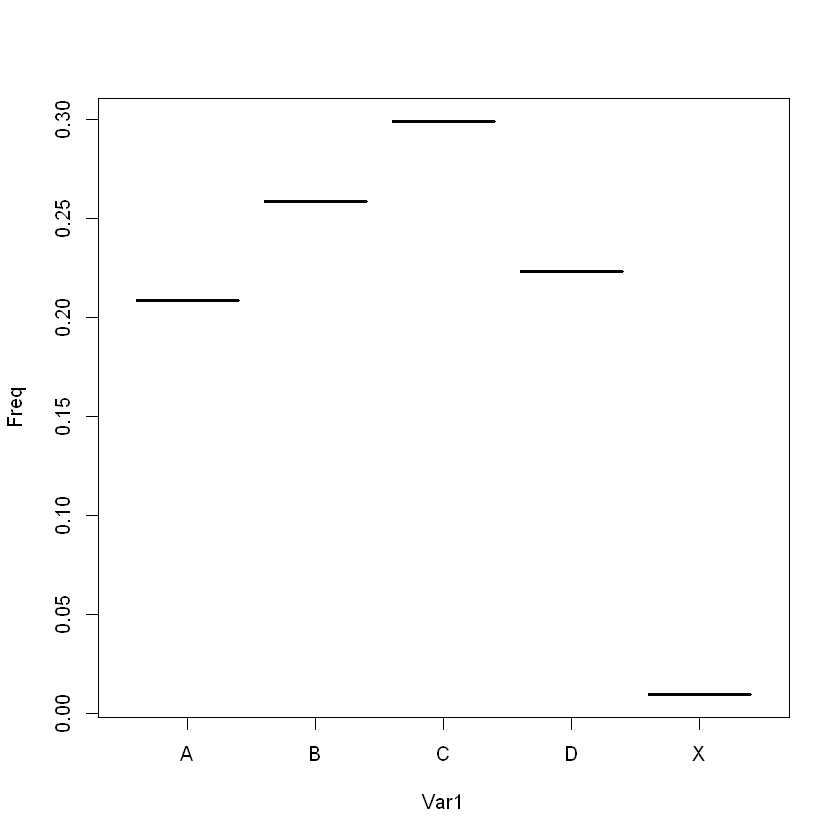

In [112]:
plot(x)

In [113]:
summary(test1_data)

ERROR: Error in summary(test1_data): object 'test1_data' not found


In [114]:
test_data

No,Std,V,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20
<dbl>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Фесюк Сергій,1,C,B,C,A,D,B,B,...,B,C,C,B,C,A,B,D,A,B
5,РАДЧУК НАТАЛІЯ,1,C,C,C,C,B,B,C,...,C,C,C,A,B,A,D,D,B,A
7,АНПІЛОГОВ АНТОН,1,C,C,C,C,C,B,B,...,C,C,C,B,C,B,B,A,A,B
8,ЗЛОЖЕНКО АНДРІЙ,1,C,B,B,C,C,B,D,...,C,C,C,B,B,A,C,D,A,B
9,ГЕРАСИМЧУК НАТАЛІЯ,1,C,C,D,D,C,C,B,...,D,C,C,A,B,X,X,X,X,X
10,АНУКОЩУК РОМАН,1,B,C,C,C,B,A,B,...,B,C,C,C,B,B,A,C,C,B
11,ЮРКІВ ДЕНИС,1,D,C,B,C,D,C,B,...,B,C,B,D,A,B,B,D,A,A
13,ТАБАЧУК ОЛЕКСАНДР,1,B,B,A,C,C,D,C,...,D,C,B,C,B,A,C,D,C,A
14,ДЯЧУК ДАРИНА,1,C,B,D,A,C,B,B,...,A,D,C,A,C,A,C,D,A,B
